In [5]:
import sys
sys.path.append('..')

from src.tp import TP_v2
from src.gp import ExactGP

import gpax
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import plotly.graph_objects as go

# Set the random seed and parameters
np.random.seed(0)
NUM_INIT_POINTS = 40
NOISE_LEVEL = 0.1
OUTLIER_NUM = 10

# Define the known function and generate data
f = lambda x: np.sin(10 * x)
X = np.random.uniform(-1., 1., NUM_INIT_POINTS)
y = f(X) + np.random.normal(0., NOISE_LEVEL, NUM_INIT_POINTS)
outlier_idx = np.random.choice(NUM_INIT_POINTS, 10)
for idx in outlier_idx:
    outlier_weight = 1 + np.random.rand(1)
    if idx % 2 == 0:
        y[idx] += outlier_weight
    else:
        y[idx] -= outlier_weight

# Create the plot with Plotly
fig = go.Figure()

# Add noisy data points
fig.add_trace(go.Scatter(x=X, y=y, mode='markers', name='Noisy Data',
                         marker=dict(size=8, color='blue')))

# Plot the true function without noise
X_line = np.linspace(-1, 1, 500)
y_line = f(X_line)
fig.add_trace(go.Scatter(x=X_line, y=y_line, mode='lines', name='True Function',
                         line=dict(color='red')))

# Update the layout
fig.update_layout(
    title='Noisy Data with Outlier and True Function',
    xaxis_title='x',
    yaxis_title='y',
    showlegend=True
)

# Show the plot
fig.show()


/var/folders/_b/b62kq0490fn2ptq7m4mbp8yr0000gp/T/ipykernel_16774/2579825121.py:20: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/_b/b62kq0490fn2ptq7m4mbp8yr0000gp/T/ipykernel_16774/2579825121.py:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [7]:
# Get random number generator keys for training and prediction
rng_key, rng_key_predict = gpax.utils.get_keys()

# Initialize model
model = TP_v2(1, kernel='RBF')
# Run Hamiltonian Monte Carlo to obtain posterior samples for kernel parameters and model noise
model.fit(rng_key, X, y, num_chains=1)

sample: 100%|██████████| 4000/4000 [00:04<00:00, 990.26it/s, 15 steps of size 2.93e-01. acc. prob=0.85] 


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         df     13.99     10.83     11.12      0.62     28.65   1286.39      1.00
k_length[0]      1.07      2.01      0.20      0.02      3.20    559.07      1.00
    k_scale      0.69      0.67      0.51      0.05      1.41    885.84      1.00
      noise      0.48      0.21      0.44      0.16      0.78    875.96      1.00



In [14]:
temp = model.mcmc.get_samples()
temp

{'df': Array([64.53694  , 14.466946 , 12.559589 , ...,  2.6978574,  4.810254 ,
         0.8719465], dtype=float32),
 'k_length': Array([[0.1457873 ],
        [0.13383016],
        [0.05580749],
        ...,
        [0.71484876],
        [1.1291654 ],
        [2.6523447 ]], dtype=float32),
 'k_scale': Array([0.9644752 , 0.7505063 , 1.0903329 , ..., 0.4570021 , 0.8091413 ,
        0.24665044], dtype=float32),
 'noise': Array([0.21192941, 0.4461081 , 0.47633433, ..., 1.1373191 , 0.7424788 ,
        0.3894609 ], dtype=float32)}

In [15]:
temp.pop('df')

Array([64.53694  , 14.466946 , 12.559589 , ...,  2.6978574,  4.810254 ,
        0.8719465], dtype=float32)

In [16]:
temp

{'k_length': Array([[0.1457873 ],
        [0.13383016],
        [0.05580749],
        ...,
        [0.71484876],
        [1.1291654 ],
        [2.6523447 ]], dtype=float32),
 'k_scale': Array([0.9644752 , 0.7505063 , 1.0903329 , ..., 0.4570021 , 0.8091413 ,
        0.24665044], dtype=float32),
 'noise': Array([0.21192941, 0.4461081 , 0.47633433, ..., 1.1373191 , 0.7424788 ,
        0.3894609 ], dtype=float32)}

In [ ]:
X_test = np.linspace(-1, 1, 100)
y_pred, y_sampled = model.predict(rng_key_predict, X_test, n=200)

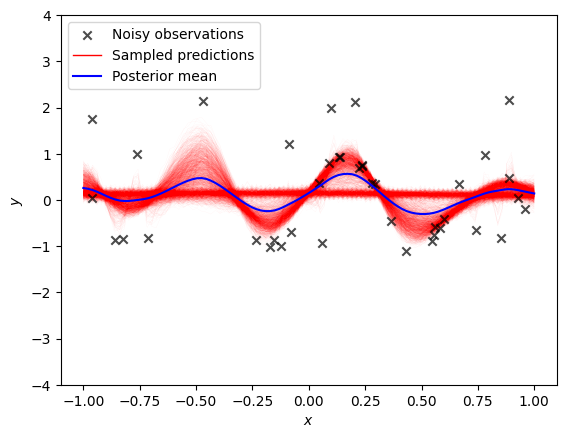

In [12]:
_, ax = plt.subplots(dpi=100)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, marker='x', c='k', zorder=1, label="Noisy observations", alpha=0.7)
for y1 in y_sampled:
    ax.plot(X_test, y1.mean(0), lw=.1, zorder=0, c='r', alpha=.1)
l, = ax.plot(X_test, y_sampled[0].mean(0), lw=1, c='r', alpha=1, label="Sampled predictions")
ax.plot(X_test, y_pred, lw=1.5, zorder=1, c='b', label='Posterior mean')
ax.legend(loc='upper left')
l.set_alpha(0)
ax.set_ylim(-4, 4);

In [13]:
y_pred_tp = y_pred

sample: 100%|██████████| 4000/4000 [00:02<00:00, 1352.58it/s, 7 steps of size 2.91e-01. acc. prob=0.85] 



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
k_length[0]      0.88      1.84      0.19      0.02      2.66    328.22      1.00
    k_scale      0.71      0.65      0.52      0.04      1.39    747.96      1.00
      noise      0.85      0.27      0.80      0.45      1.28    313.62      1.00



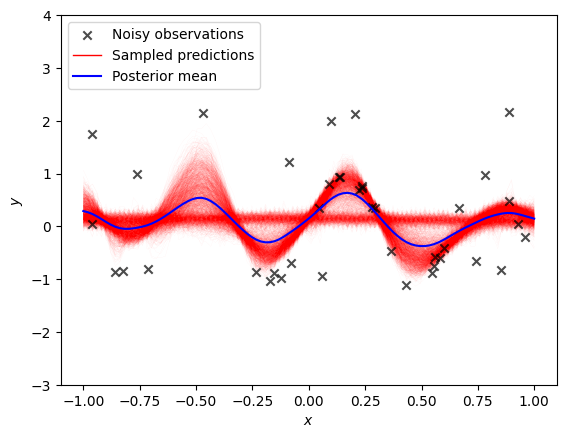

In [14]:
# Get random number generator keys for training and prediction
rng_key, rng_key_predict = gpax.utils.get_keys()

# Initialize model
model = ExactGP(1, kernel='RBF')
# Run Hamiltonian Monte Carlo to obtain posterior samples for kernel parameters and model noise
model.fit(rng_key, X, y, num_chains=1)

X_test = np.linspace(-1, 1, 100)
y_pred, y_sampled = model.predict(rng_key_predict, X_test, n=200)

_, ax = plt.subplots(dpi=100)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(X, y, marker='x', c='k', zorder=1, label="Noisy observations", alpha=0.7)
for y1 in y_sampled:
    ax.plot(X_test, y1.mean(0), lw=.1, zorder=0, c='r', alpha=.1)
l, = ax.plot(X_test, y_sampled[0].mean(0), lw=1, c='r', alpha=1, label="Sampled predictions")
ax.plot(X_test, y_pred, lw=1.5, zorder=1, c='b', label='Posterior mean')
ax.legend(loc='upper left')
l.set_alpha(0)
ax.set_ylim(-3, 4);

In [15]:
y_pred_gp = y_pred

In [16]:
sum(abs(y_pred_tp - y_pred_gp))

Array(3.305248, dtype=float32)